In [1]:
import pandas as pd
import os.path as op
from tqdm import tqdm_notebook as tqdm
from importlib import reload
import ast
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Combine DFs to obtain the Main Dataset

In [2]:
import os
dataset_s1_files = []
for f in os.listdir('Manuscript/SupplementaryMaterialData/DatasetS1/'):
    if '.csv' in f:
        dataset_s1_files +=[f]
dataset_s1_files.sort()
dataset_s1_files

['DatasetS1_00_0_100000.csv',
 'DatasetS1_01_100001_200000.csv',
 'DatasetS1_02_200001_300000.csv',
 'DatasetS1_03_300001_400000.csv',
 'DatasetS1_04_400001_500000.csv',
 'DatasetS1_05_500001_600000.csv',
 'DatasetS1_06_600001_700000.csv',
 'DatasetS1_07_700001_800000.csv',
 'DatasetS1_08_800001_900000.csv',
 'DatasetS1_09_900001_1000000.csv',
 'DatasetS1_10_1000001_1100000.csv',
 'DatasetS1_11_1100001_1200000.csv',
 'DatasetS1_12_1200001_1300000.csv',
 'DatasetS1_13_1300001_1400000.csv',
 'DatasetS1_14_1400001_1500000.csv',
 'DatasetS1_15_1500001_1600000.csv',
 'DatasetS1_16_1600001_1700000.csv',
 'DatasetS1_17_1700001_1800000.csv',
 'DatasetS1_18_1800001_1900000.csv',
 'DatasetS1_19_1900001_2000000.csv',
 'DatasetS1_20_2000001_2100000.csv',
 'DatasetS1_21_2100001_2200000.csv',
 'DatasetS1_22_2200001_2300000.csv',
 'DatasetS1_23_2300001_2400000.csv',
 'DatasetS1_24_2400001_2500000.csv',
 'DatasetS1_25_2500001_2600000.csv',
 'DatasetS1_26_2600001_2699454.csv']

In [3]:
appender = []

for f in tqdm(dataset_s1_files):
    fp = op.join('Manuscript/SupplementaryMaterialData/DatasetS1', f)
    dftemp = pd.read_csv(fp, index_col=0)
    appender += list(dftemp.to_records(index = False))
#     break


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


A Jupyter Widget

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (52,53,54,55,56,57,58,59,61,63,66,68,69,70,71,72,73,75,77,79,81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (51,52,53,54,55,56,57,58,60,61,63,65,66,68,69,70,71,72,73,75,77,81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (51,52,53,54,55,56,57,58,61,63,65,66,68,69,70,71,72,73,74,75,77,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWa

In [4]:
dfQSPACE_gs = pd.DataFrame.from_records(appender, columns = dftemp.columns.tolist())

# Fig 1

In [5]:
def uniqueGenomePostions(df):
    geneDict = df['gene'].to_dict()
    geneSeqIdDict = df['geneSeqId'].to_dict()
    geneSeqNumDict = df['seqNum'].to_dict()
    geneSeqAA1Dict = df['seqAA1'].to_dict()


    global_genome_positions = {}
    for index , gene in tqdm(geneDict.items()):
        seq_id = geneSeqIdDict[index]
        seq_num = geneSeqNumDict[index]
        seq_aa1 = geneSeqAA1Dict[index]

        glob_id = "{}&{}&{}&{}".format(gene,seq_id,seq_num,seq_aa1)

        global_genome_positions.update({index : glob_id})

    df['UniqueGenomePosition'] = pd.Series(global_genome_positions)
    return df

def panel1E(df):
    cplxList = df.cplx.unique()
    genesList = df.gene.unique()
    structuresList = df.structureId.unique()
    num_AAs = len(df)
    unique_genome_positions =  df.UniqueGenomePosition.unique()

    print ("Number of Genes       : {}".format(len(genesList)))
    print ("Number of Enzymes     : {}".format(len(cplxList)))

    print ("Number of Structures  : {}".format(len(structuresList)))
    print ("Number of Amino Acids : {}".format(num_AAs))
    print ("Number of Genome Positions : {}".format(len(unique_genome_positions)))

##### Panel 1E

In [6]:
dfQSPACE_gs = uniqueGenomePostions(dfQSPACE_gs)
panel1E(dfQSPACE_gs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


A Jupyter Widget


Number of Genes       : 4309
Number of Enzymes     : 3985
Number of Structures  : 4094
Number of Amino Acids : 2699455
Number of Genome Positions : 1343732


##### Panel 1F

In [7]:
from _figuresModule import _fig1
reload(_fig1)

<module '_figuresModule._fig1' from '/home/ecatoiu/Projects/QSPACE/_figuresModule/_fig1.py'>

In [8]:
dfQSPACE_gs.columns


Index(['cplx', 'gene', 'geneSeqId', 'seqNum', 'seqAA1', 'structureId',
       'structureStoich', 'matchType', 'structNum', 'structAA1', 'structChain',
       'structChainId', 'structChainId_mod', 'Chain_Residue', 'sfileChainId',
       'sfileChain_Residue', '005F_Protein_Compartment', '005F_AA_Compartment',
       '006A_disembl_coils', '006A_disembl_rem465', '006A_disembl_hotloops',
       '006B_SCRATCH_ss', '006B_SCRATCH_acc', '006B_SCRATCH_acc20',
       '006B_SCRATCH_ss8', '006C_MSMS_residue_depth',
       '006C_MSMS_alphacarbon_depth', '006D_Disfulfide_Bridges_3A',
       '006E_ppInterface_ScanNet', '006E_ppInterface_Geometry_10Angs',
       '006E_ppInterface_Geometry_3Angs', '006E_ppInterface_Geometry_5Angs',
       '006E_ppInterface_Geometry_7.5Angs', '006F_DSSP_aa', '006F_DSSP_phi',
       '006F_DSSP_psi', '006F_DSSP_O_NH_1_energy', '006F_DSSP_O_NH_2_energy',
       '006F_DSSP_ss', '006F_DSSP_NH_O_1_energy', '006F_DSSP_NH_O_2_energy',
       '006F_DSSP_NH_O_1_relidx', '006F_DSSP

In [9]:
skeleton_cols = ['cplx','gene','geneSeqId','seqNum','seqAA1','structureId','structureStoich',
                 'matchType','structNum','structAA1','structChain','structChainId', 
                 'structChainId_mod', 'Chain_Residue', 'sfileChainId', 'sfileChain_Residue',]

A Jupyter Widget

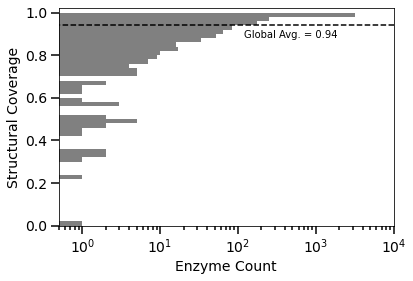

In [10]:
#inputs QPSACE-GS Supp Data 1
fig, ax =_fig1.fig1_F(dfskeleton = dfQSPACE_gs[skeleton_cols])
for ax in [ax]:
    ax.tick_params(axis='both', which='major', labelsize=14,length = 8, width = 1.5,)
    ax.tick_params(axis='both', which='minor', labelsize=14,length = 4, width = 1.5)
fig.savefig('Manuscript/GeneratedFigures/Fig1F.png',dpi = 300,transparent = True, bbox_inches = 'tight')
plt.show()

##### Panel 1G

In [11]:
categoriesDict  = {}
#structural properties
categoriesDict.update({r'\alpha - helix' : len(dfQSPACE_gs[dfQSPACE_gs.get('006F_DSSP_ss') =='H'].UniqueGenomePosition.unique())})
categoriesDict.update({r'\Beta sheet' : len(dfQSPACE_gs[dfQSPACE_gs.get('006F_DSSP_ss') =='E'].UniqueGenomePosition.unique())})
#functional domains
categoriesDict.update({'Metal Binding' : len(dfQSPACE_gs[dfQSPACE_gs.get('007A_FunctionalDomains_METAL').isna() == False].UniqueGenomePosition.unique())})
categoriesDict.update({'Active Site' : len(dfQSPACE_gs[dfQSPACE_gs.get('007A_FunctionalDomains_ACT_SITE').isna() == False].UniqueGenomePosition.unique())})
categoriesDict.update({'DNA Binding' : len(dfQSPACE_gs[dfQSPACE_gs.get('007A_FunctionalDomains_DNA_BIND').isna() == False].UniqueGenomePosition.unique())})
categoriesDict.update({'Disulfide Bridge' : len(dfQSPACE_gs[dfQSPACE_gs.get('006D_Disfulfide_Bridges_3A').isna() == False].UniqueGenomePosition.unique())})
#compartments
kw = ['IM-IM_2-Embedded','IM-IM_1-Embedded','IM-Cytoplasmic-Embedded','IM-Periplasmic_C-Embedded',]
dfdata = dfQSPACE_gs[dfQSPACE_gs.get('005F_AA_Compartment').isin(kw)]
categoriesDict.update({'Inner Membrane (Embedded)' : len(dfdata.UniqueGenomePosition.unique())})
kw = ['OM-Periplasmic_E-Embedded', 'OM-Extracellular-Embedded', 'OM-OM_1-Embedded', 'OM-OM_2-Embedded',]
dfdata = dfQSPACE_gs[dfQSPACE_gs.get('005F_AA_Compartment').isin(kw)]
categoriesDict.update({'Outer Membrane (Embedded)' : len(dfdata.UniqueGenomePosition.unique())})
kw = ['IM-IM_2-Bulb','IM-IM_1-Bulb','IM-Cytoplasmic-Bulb','IM-Periplasmic_C-Bulb',]
dfdata = dfQSPACE_gs[dfQSPACE_gs.get('005F_AA_Compartment').isin(kw)]
categoriesDict.update({'Inner Membrane (Bulb)' : len(dfdata.UniqueGenomePosition.unique())})
kw = ['OM-Periplasmic_E-Bulb', 'OM-Extracellular-Bulb', 'OM-OM_1-Bulb', 'OM-OM_2-Bulb',]
dfdata = dfQSPACE_gs[dfQSPACE_gs.get('005F_AA_Compartment').isin(kw)]
categoriesDict.update({'Outer Membrane (Bulb)' : len(dfdata.UniqueGenomePosition.unique())})
#scannet interface
dfdata = dfQSPACE_gs[dfQSPACE_gs.get('006E_ppInterface_ScanNet') >= 0.85]
categoriesDict.update({'Protein-Protein Interface' : len(dfdata.UniqueGenomePosition.unique())})
#disorder
dfdata = dfQSPACE_gs[dfQSPACE_gs.get( '006A_disembl_hotloops') == 1]
categoriesDict.update({'Disordered Regions' : len(dfdata.UniqueGenomePosition.unique())})
#mutations
dfdata = dfQSPACE_gs[dfQSPACE_gs.get( '007C_LabMutant_LTEE_VariantGS').isna()== False]
categoriesDict.update({'LTEE Mutant' : len(dfdata.UniqueGenomePosition.unique())})
dfdata = dfQSPACE_gs[dfQSPACE_gs.get( '007B_LabMutant_ALE_VariantGS').isna()== False]
categoriesDict.update({'ALE Mutant' : len(dfdata.UniqueGenomePosition.unique())})
dfdata = dfQSPACE_gs[dfQSPACE_gs.get('007D_WT_alleleome_AA_DominantWTFreq') <0.9]
categoriesDict.update({'WT AA Variation > 10%' : len(dfdata.UniqueGenomePosition.unique())})

categoriesDict

{'\\alpha - helix': 564656,
 '\\Beta sheet': 242348,
 'Metal Binding': 2757,
 'Active Site': 1155,
 'DNA Binding': 7151,
 'Disulfide Bridge': 1050,
 'Inner Membrane (Embedded)': 147621,
 'Outer Membrane (Embedded)': 12631,
 'Inner Membrane (Bulb)': 238935,
 'Outer Membrane (Bulb)': 33918,
 'Protein-Protein Interface': 36526,
 'Disordered Regions': 221939,
 'LTEE Mutant': 10365,
 'ALE Mutant': 42785,
 'WT AA Variation > 10%': 29505}

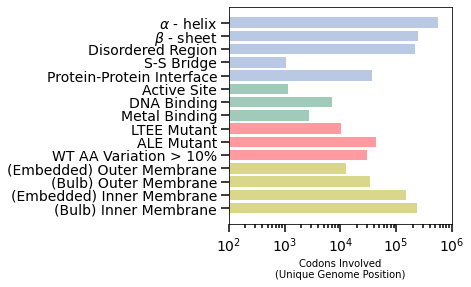

In [12]:
fig, ax = plt.subplots()
fig.set_figwidth(4)


labels = [r'\alpha - helix',
          r'\Beta sheet',
          'Disordered Regions',
          'Disulfide Bridge',
          'Protein-Protein Interface',

          'Active Site',
          'DNA Binding',
          'Metal Binding',
          
          'LTEE Mutant',
          'ALE Mutant',
          'WT AA Variation > 10%',
          
          'Outer Membrane (Embedded)',
          'Outer Membrane (Bulb)',
          'Inner Membrane (Embedded)',
          'Inner Membrane (Bulb)',
          
         ]
labels.reverse()
for i, cat in enumerate(labels):
    if cat in [r'\alpha - helix', r'\Beta sheet', 'Disordered Regions', 'Disulfide Bridge','Protein-Protein Interface',]:
        color = '#B9C8E3'
    if cat in ['ALE Mutant','LTEE Mutant','WT AA Variation > 10%']:
        color = '#FF9BA0'
    if cat in ['Active Site', 'DNA Binding', 'Metal Binding',]:
        color = '#A1CABA'
    
    if cat in [ 'Outer Membrane (Embedded)', 'Outer Membrane (Bulb)',]:
        color = u'#DAD68A'
    if cat in ['Inner Membrane (Embedded)','Inner Membrane (Bulb)',]:
        color = u'#DAD68A'
    data = categoriesDict[cat]
    ax.barh(i, data, color = color,alpha = 1)
#     labels +=[cat]

labels = ['(Bulb) Inner Membrane',
          '(Embedded) Inner Membrane',
          '(Bulb) Outer Membrane',
          '(Embedded) Outer Membrane',
          'WT AA Variation > 10%',
          'ALE Mutant',      
          'LTEE Mutant',
          'Metal Binding',
          'DNA Binding',
          'Active Site',
          'Protein-Protein Interface',
          'S-S Bridge',
          'Disordered Region',
          r'$\beta$ - sheet',
          r'$\alpha$ - helix']

ax.set_yticks(np.linspace(0,14,15) )
ax.set_ylim(-1.2,15.2)
ax.set_yticklabels( labels )
ax.set_xlim(100,10e5)
ax.set_xscale('log')
ax.set_xlabel('Codons Involved\n(Unique Genome Position)')
for ax in [ax]:
    ax.tick_params(axis='both', which='major', labelsize=14,length = 8, width = 1.5,)
    ax.tick_params(axis='both', which='minor', labelsize=14,length = 4, width = 1.5)
    
fig.savefig('Manuscript/GeneratedFigures/Fig1G.png',dpi = 300,transparent = True, bbox_inches = 'tight')


# Fig. 2

In [13]:
from _figuresModule import _fig2
reload(_fig2)

<module '_figuresModule._fig2' from '/home/ecatoiu/Projects/QSPACE/_figuresModule/_fig2.py'>

##### Panel 2B

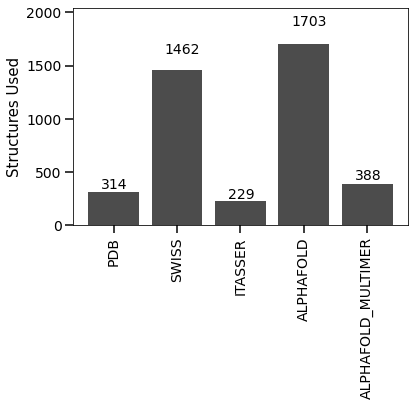

In [14]:
dfProtToStructMatches = pd.read_csv('Manuscript/SelectedOutputData/004A-BFS_best_match_for_3985_protein_complexes.csv', index_col = 0 )
fig, ax = _fig2.fig2_B(dfProtToStructMatches, fig = False, ax = False, save = False)
ax.set_ylabel("Structures Used", size = 15)
fig.savefig('Manuscript/GeneratedFigures/Fig2B.png',dpi = 300,transparent = True, bbox_inches = 'tight')

##### Panel 2C

A Jupyter Widget

A Jupyter Widget

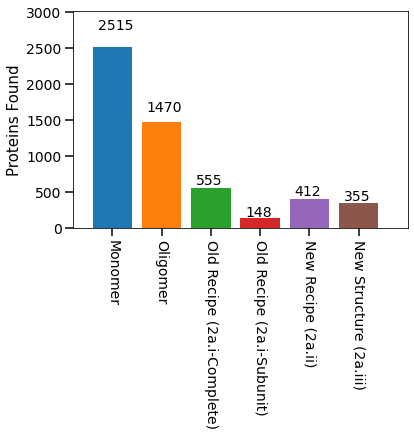

In [15]:
from _figuresModule import _fig2
reload(_fig2)

dfProtToStructMatches = pd.read_csv('Manuscript/SelectedOutputData/004A-BFS_best_match_for_3985_protein_complexes.csv', index_col = 0 )
proteinTargetsOld = pd.read_csv('Manuscript/SelectedOutputData/003A-enzyme_targets_prior_to_BFS.csv',index_col=0,engine='python')
proteinTargetsNew = pd.read_csv('Manuscript/SelectedOutputData/003B-enzyme_targets_with_new_oligomers.csv',index_col=0,engine='python')
fig, ax = _fig2.fig2_C(dfqual = dfProtToStructMatches,
                       proteinTargetsOld = proteinTargetsOld,
                       proteinTargetsNew = proteinTargetsNew,
                      )
fig.savefig('Manuscript/GeneratedFigures/Fig2C.png',dpi = 300,transparent = True, bbox_inches = 'tight')

##### Panel 2D

A Jupyter Widget

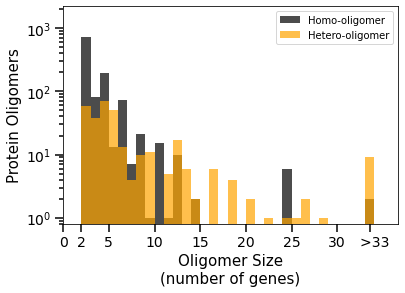

In [16]:
from _figuresModule import _fig2
reload(_fig2)

dfProtToStructMatches = pd.read_csv('Manuscript/SelectedOutputData/004A-BFS_best_match_for_3985_protein_complexes.csv', index_col = 0 )
proteinTargetsNew = pd.read_csv('Manuscript/SelectedOutputData/003B-enzyme_targets_with_new_oligomers.csv',index_col=0,engine='python')

fig,ax = _fig2.fig2_D(dfqual = dfProtToStructMatches,
                      proteinTargetsNew = proteinTargetsNew,
                     )
fig.savefig('Manuscript/GeneratedFigures/Fig2D.png',dpi = 300,transparent = True, bbox_inches = 'tight')

# Fig. 3 

used PDB:2GRX in manuscript

##### Panel 3A - FUNCTIONAL REGIONS

In [17]:
import nglview

A Jupyter Widget

In [18]:
functional_cols = ['007A_FunctionalDomains_DOMAIN', '007A_FunctionalDomains_DNA_BIND',
                   '007A_FunctionalDomains_BINDING', '007A_FunctionalDomains_METAL',
                   '007A_FunctionalDomains_SITE','006D_Disfulfide_Bridges_3A',
                   '007A_FunctionalDomains_NP_BIND', '007A_FunctionalDomains_MOTIF',
                   '007A_FunctionalDomains_ACT_SITE',
                   '007A_FunctionalDomains_COILED', '007A_FunctionalDomains_REGION',
                   '007A_FunctionalDomains_CA_BIND',]

dfs = dfQSPACE_gs[dfQSPACE_gs.structureId =='AF-P06971-F1-model_v2']
dfs_func = dfs[functional_cols].dropna(how = 'all')
dfs_func = dfs_func.dropna(how = 'all',axis = 1)
cols = ['sfileChain_Residue','007A_FunctionalDomains_BINDING',
        '007A_FunctionalDomains_MOTIF','007A_FunctionalDomains_REGION','006D_Disfulfide_Bridges_3A']
dfs_func = dfs[dfs.index.isin(dfs_func.index)][cols]
dfs_func.head()

,sfileChain_Residue,007A_FunctionalDomains_BINDING,007A_FunctionalDomains_MOTIF,007A_FunctionalDomains_REGION,006D_Disfulfide_Bridges_3A
2421106,A_40,NaN,"['/note=""TonB box""']",NaN,NaN
2421107,A_41,NaN,"['/note=""TonB box""']",NaN,NaN
2421108,A_42,NaN,"['/note=""TonB box""']",NaN,NaN
2421109,A_43,NaN,"['/note=""TonB box""']",NaN,NaN
2421110,A_44,NaN,"['/note=""TonB box""']",NaN,NaN


In [19]:
v = nglview.show_structure_file('Manuscript/SelectedOutputData/AF-P06971-F1-model_v2.pdb')
v.clear_representations()
v.add_rope(selection = 'protein', color = 'grey')

#ferrichrom orange
dftemp= dfs_func[dfs_func.get("007A_FunctionalDomains_BINDING").isna() == False]
for cr in  dftemp.sfileChain_Residue.tolist():
    [c,r] = cr.split('_')
    v.add_surface(":{} and ({} and not hydrogen)".format(c,r), color = 'orange')

# s-s cyan
dftemp= dfs_func[dfs_func.get("006D_Disfulfide_Bridges_3A").isna() == False]
for cr in  dftemp.sfileChain_Residue.tolist():
    [c,r] = cr.split('_')
    v.add_surface(":{} and ({} and not hydrogen)".format(c,r), color = 'cyan')
    
dftemp= dfs_func[dfs_func.get("007A_FunctionalDomains_MOTIF") == str(['/note="TonB box"'])]
for cr in  dftemp.sfileChain_Residue.tolist():
    [c,r] = cr.split('_')
    v.add_surface(":{} and ({} and not hydrogen)".format(c,r), color = 'yellow')

dftemp= dfs_func[dfs_func.get("007A_FunctionalDomains_MOTIF") == str(['/note="TonB C-terminal box"'])]
for cr in  dftemp.sfileChain_Residue.tolist():
    [c,r] = cr.split('_')
    v.add_surface(":{} and ({} and not hydrogen)".format(c,r), color = 'pink')
    
v

A Jupyter Widget

##### PANEL 3A - ALE MUTANTS

A Jupyter Widget

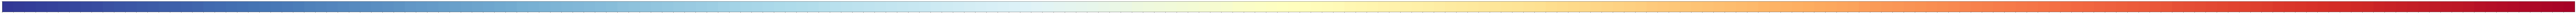

In [20]:
functional_cols = ['007B_LabMutant_ALE_VariantGS','007C_LabMutant_LTEE_VariantGS']

dfs = dfQSPACE_gs[dfQSPACE_gs.structureId =='AF-P06971-F1-model_v2']

dfs_func = dfs[functional_cols].dropna(how = 'all')
dfs_func = dfs_func.dropna(how = 'all',axis = 1)
cols = functional_cols + ['sfileChain_Residue']
dfs_func = dfs[dfs.index.isin(dfs_func.index)][cols]

import seaborn as sns
colors = sns.color_palette('RdYlBu_r',230).as_hex()
sns.palplot(colors)

v = nglview.show_structure_file('Manuscript/SelectedOutputData/AF-P06971-F1-model_v2.pdb')
v.clear_representations()
v.add_rope(selection = 'protein', color = 'grey')

#ferrichrom orange
key = "007B_LabMutant_ALE_VariantGS"
dftemp= dfs_func[dfs_func.get(key).isna() == False]
for index,  cr in  dftemp.sfileChain_Residue.to_dict().items():
    [c,r] = cr.split('_')
    
    mut = ast.literal_eval(dftemp.loc[index,key])
    color = colors[np.max(list(mut.values()))]
    v.add_surface(":{} and ({} and not hydrogen)".format(c,r), color = color)

    
v

##### PANEL 3A - LTEE MUTANTS

A Jupyter Widget

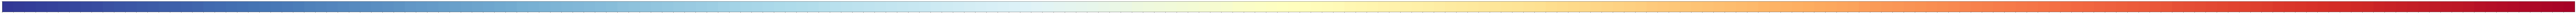

In [21]:
functional_cols = ['007B_LabMutant_ALE_VariantGS','007C_LabMutant_LTEE_VariantGS']

dfs = dfQSPACE_gs[dfQSPACE_gs.structureId =='AF-P06971-F1-model_v2']

dfs_func = dfs[functional_cols].dropna(how = 'all')
dfs_func = dfs_func.dropna(how = 'all',axis = 1)
cols = functional_cols + ['sfileChain_Residue']
dfs_func = dfs[dfs.index.isin(dfs_func.index)][cols]
dfs_func.head()

import seaborn as sns
colors = sns.color_palette('RdYlBu_r',230).as_hex()
sns.palplot(colors)

v = nglview.show_structure_file('Manuscript/SelectedOutputData/AF-P06971-F1-model_v2.pdb')
v.clear_representations()
v.add_rope(selection = 'protein', color = 'grey')

#ferrichrom orange
key = "007C_LabMutant_LTEE_VariantGS"
dftemp= dfs_func[dfs_func.get(key).isna() == False]
for index,  cr in  dftemp.sfileChain_Residue.to_dict().items():
    [c,r] = cr.split('_')
    
    mut = ast.literal_eval(dftemp.loc[index,key])
    color = colors[np.max(list(mut.values()))]
    v.add_surface(":{} and ({} and not hydrogen)".format(c,r), color = color)

    
v

##### Panel 3A WT variation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


A Jupyter Widget

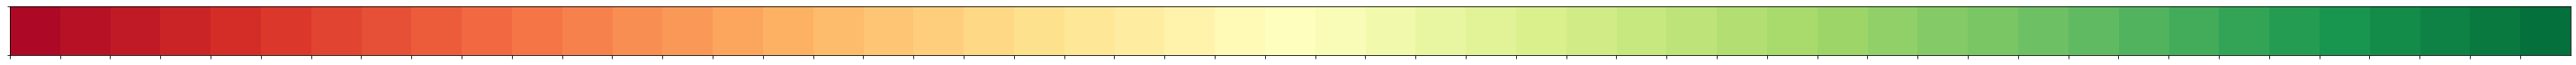

In [22]:
import seaborn as sns
colors = sns.color_palette('RdYlGn',51).as_hex()
sns.palplot(colors)

dfs = dfQSPACE_gs[dfQSPACE_gs.structureId =='AF-P06971-F1-model_v2']
key = '007D_WT_alleleome_AA_DominantWTFreq'

n, bins = np.histogram(dfs.get(key).values, bins = np.linspace(0.5,1,51))

prev_i = 0 
prev_bin = 0.5
colors_series = {}
key = '007D_WT_alleleome_AA_DominantWTFreq'
for i , bin_value in enumerate(bins):
    if i == 0:
        continue
    dft = dfs[dfs.get(key) >= prev_bin]
    dft = dft[dft.get(key) < bin_value]
    for index in dft.index.tolist():
        colors_series.update({index : colors[i]})
    prev_bin = bin_value
    prev_i = i
    
#     if bin_value > .70:
#         break

dft = dfs[dfs.get(key) == 1]    
for index in dft.index.tolist():
    colors_series.update({index : colors[i]})
dfs['color_to_plot']  = pd.Series(colors_series)

v = nglview.show_structure_file('Manuscript/SelectedOutputData/AF-P06971-F1-model_v2.pdb')
v.clear_representations()
v.add_rope(selection = 'protein', color = 'grey')

for index, row in dfs[dfs.color_to_plot.isna() == False].iterrows():
    if row.get(key)>0.9:
        continue
    [c,r] = row.sfileChain_Residue.split('_')
    v.add_surface(":{} and ({} and not hydrogen)".format(c,r), color = row.color_to_plot)
v

##### Panel 3B - venn diagram

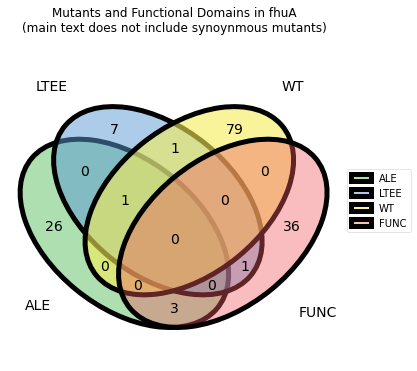

In [23]:
key = "007B_LabMutant_ALE_VariantGS"
dfs[dfs.get(key).isna() == False][key]

dfs = dfQSPACE_gs[dfQSPACE_gs.structureId =='AF-P06971-F1-model_v2']

key = '007D_WT_alleleome_AA_DominantWTFreq'
wt_index = set(dfs[dfs.get(key)<0.9].index.tolist())

key = "007C_LabMutant_LTEE_VariantGS"
ltee_index = set(dfs[dfs.get(key).isna() == False].index.tolist())

key = "007B_LabMutant_ALE_VariantGS"
ale_index = set(dfs[dfs.get(key).isna() == False].index.tolist())




functional_cols = ['007A_FunctionalDomains_DOMAIN', '007A_FunctionalDomains_DNA_BIND',
                   '007A_FunctionalDomains_BINDING', '007A_FunctionalDomains_METAL',
                   '007A_FunctionalDomains_SITE','006D_Disfulfide_Bridges_3A',
                   '007A_FunctionalDomains_NP_BIND', '007A_FunctionalDomains_MOTIF',
                   '007A_FunctionalDomains_ACT_SITE',
                   '007A_FunctionalDomains_COILED', '007A_FunctionalDomains_REGION',
                   '007A_FunctionalDomains_CA_BIND',]

dfs = dfQSPACE_gs[dfQSPACE_gs.structureId =='AF-P06971-F1-model_v2']
dfs_func = dfs[functional_cols].dropna(how = 'all')
dfs_func = dfs_func.dropna(how = 'all',axis = 1)
cols = ['sfileChain_Residue','007A_FunctionalDomains_BINDING',
        '007A_FunctionalDomains_MOTIF','007A_FunctionalDomains_REGION','006D_Disfulfide_Bridges_3A']
dfs_func = dfs[dfs.index.isin(dfs_func.index)][cols]
function_index = set(dfs_func.index.tolist())


from functions import venn
fig,ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(6)
ax.set_title('Mutants and Functional Domains in fhuA\n(main text does not include synoynmous mutants)')
labels = venn.get_labels([ale_index,ltee_index,wt_index,function_index])
venn.venn4(labels, names = ['ALE','LTEE','WT','FUNC'], fig = fig, ax = ax)
fig.savefig('Manuscript/GeneratedFigures/Fig3B.png',dpi = 300,transparent = True, bbox_inches = 'tight')

##### Panel 3C

In [24]:
from ssbio.protein.structure.structprop import StructProp
from _membraneModule.utils import find_sfile
from functions import protein_geometry
import os

/usr/local/lib/python3.7/dist-packages/Bio/pairwise2.py:283: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  BiopythonDeprecationWarning,


### With Access to the Structure Files..
the following code below is how Dataset S5A is generated

In [25]:
# def find_structure_file(structureId, stype):
#     if stype =='PDB':
#         sfile = '../../../../../../mnt/wwn-0x5000c500b96b98e1-part1/QSPACE_ecoli/structures/all_bioassemblies/{}.cif'.format(structureId)
#         if op.exists(sfile):
#             return sfile
        
#         sfile = '../../../../../../mnt/wwn-0x5000c500b96b98e1-part1/QSPACE_ecoli/structures/all_cifs/{}.cif'.format(structureId)
#         if op.exists(sfile):
#             return sfile

#         sfile = '../../../../../../mnt/wwn-0x5000c500b96b98e1-part1/QSPACE_ecoli/structures/all_pdbs/{}.pdb'.format(structureId)
#         if op.exists(sfile):
#             return sfile
#         return False
#     if stype =='SWISS':
#         sfile = '../../../../../../mnt/wwn-0x5000c500b96b98e1-part1/QSPACE_ecoli/structures/all_swiss/{}.pdb'.format(structureId)
#         if op.exists(sfile):
#             return sfile
#         return False
    
#     if stype =='ITASSER':
#         sfile = '../../../../../../mnt/wwn-0x5000c500b96b98e1-part1/QSPACE_ecoli/structures/all_itasser_clean_string_removed/{}.pdb'.format(structureId)
#         if op.exists(sfile):
#             return sfile
#         return False
    
#     if stype =='ALPHAFOLD':
#         sfile = '../../../../../../mnt/wwn-0x5000c500b96b98e1-part1/QSPACE_ecoli/structures/all_alphafold/{}.pdb'.format(structureId)
#         if op.exists(sfile):
#             return sfile
#         return False
#     if stype =='ALPHAFOLD_MULTIMER':
#         alphaStructId = structureId.split('_Alpha')[0]
#         resultFolder = '../../../../../../mnt/wwn-0x5000c500b96b98e1-part1/QSPACE_ecoli/structures/all_alphafoldMultimer/{}.result/'.format(alphaStructId)
# #         print resultFolder
        
#         if not op.exists(resultFolder):
#             return False
        
#         for f in os.listdir(resultFolder):
#             if alphaStructId in f and ".pdb" in f:
#                 if 'rank_1' in f or "rank_001" in f:
#                     sfile = op.join(resultFolder, f)
#                     return sfile
#         return False
    
# mut_col = '007B_LabMutant_ALE_VariantGS'
# out_col = '009_LabMutant_ALE_max_GS'

# def get_max_gs(mut_col, dfalldata):
    
#     mut_gs= dfalldata.get(mut_col).dropna().to_dict()
#     mut_gs_max = {}
    
#     for glob_index, gs_info in tqdm(mut_gs.items()):
#         if type(gs_info) == str:
#             gs_info = ast.literal_eval(gs_info)
#         gs_info_int = {}
#         for mut, gs in gs_info.items():
#             if 'TERM' in str(mut) or '*' in str(mut):
#                 continue
#             gs_info_int.update({mut : int(gs)})
        
#         if len(gs_info_int) == 0:
#             continue
#         gs_max = np.max(list(gs_info_int.values()))
#         mut_gs_max.update({glob_index : gs_max})
#     return mut_gs_max

# mut_col = '007B_LabMutant_ALE_VariantGS'
# gs_max = get_max_gs(mut_col, dfalldata= dfQSPACE_gs)
# dfQSPACE_gs['009_gs_max_ALE'] = pd.Series(gs_max) 

# mut_col = '009_gs_max_ALE'
# mut_data_col = '007B_LabMutant_ALE_VariantGS'
# functional_col = '007A_FunctionalDomains_ACT_SITE'

# dfmut= dfQSPACE_gs[dfQSPACE_gs.get(mut_col).isna() == False]
# df_domain= dfQSPACE_gs[dfQSPACE_gs.get(functional_col).isna() == False]

# checked = []
# proximity_index = 0 
# appender = []
# for sId in tqdm(dfmut.structureId.unique()):
    
    
#     dfs_mut = dfmut[dfmut.structureId ==sId]
#     dfs_mut = dfs_mut[dfs_mut.structNum.isna() == False]
#     dfs_domain = df_domain[df_domain.structureId ==sId]
#     dfs_domain = dfs_domain[dfs_domain.structNum.isna() == False]
    
#     if len(dfs_domain) == 0:
#         continue
    
    
#     if 'AF' in sId and 'model_v' in sId:
#         stype = 'ALPHAFOLD'
#     elif 'AlphaMulti' in sId:
#         stype ='ALPHAFOLD_MULTIMER'
#     elif 'assembly' in sId:
#         stype = 'PDB'
#     elif "clean_residues_removed" in sId:
#         stype = 'ITASSER'
#     else:
#         stype = 'SWISS'
        
#     sfile = find_structure_file(sId, stype=stype)
#     s = StructProp(ident = sId,structure_path=sfile, file_type = op.basename(sfile).split('.')[-1])
#     p = s.parse_structure()
    
    
#     for Mut_Index, Mut_sfileChain_residue  in dfs_mut.sfileChain_Residue.to_dict().items():
#         mutChain, mutRes = Mut_sfileChain_residue.split('_')
#         mutCoord = p.first_model[mutChain][int(mutRes)]['CA'].coord
        
#         #find distance between mutation and all domain residues
#         distance_dict = {}
#         for dom_Index, dom_sfileChain_residue in dfs_domain.sfileChain_Residue.to_dict().items():
#             domChain, domRes = dom_sfileChain_residue.split('_')
#             domCoord = p.first_model[domChain][int(domRes)]['CA'].coord
#             distance = protein_geometry.distance_two_points(mutCoord, domCoord)
#             distance_dict.update({dom_Index : distance})
            
#         #find distance to closest domain residue
#         for dom_Index, distance in distance_dict.items():
#             if distance == np.min(list(distance_dict.values())) :
#                 info_1 = dfs_mut.loc[Mut_Index,'structureId']
#                 info_2 = dfs_mut.loc[Mut_Index,'gene']
#                 info_3 = dfs_mut.loc[Mut_Index,'geneSeqId']
#                 info_4 = dfs_mut.loc[Mut_Index,"seqNum"]
#                 info_5 = dfs_mut.loc[Mut_Index,"seqAA1"]
#                 info_6 = dfs_mut.loc[Mut_Index,"UniqueGenomePosition"]
#                 info_7 = dfs_mut.loc[Mut_Index,"sfileChain_Residue"]
#                 info_8 = dfs_mut.loc[Mut_Index,mut_data_col]
#                 info_9 = dfs_mut.loc[Mut_Index,mut_col]
#                 info_10 = dfs_domain.loc[dom_Index,functional_col]
#                 #distance goes here
#                 info_11 = dfs_domain.loc[dom_Index,"sfileChain_Residue"]
#                 info_12 = dfs_domain.loc[dom_Index,"seqNum"]
#                 info_13 = dfs_domain.loc[dom_Index,"seqAA1"]
#                 info_14 = dfs_domain.loc[dom_Index,"UniqueGenomePosition"]

#                 info = [info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,distance,info_11,info_12,info_13,info_14]
#                 appender.append(info)
                
#                 break
                
# dfcols = ['structureId','gene','geneSeqId','seqNum','seqAA1','UniqueGenomePosition','LabMutant_sfileChain_Residue',mut_data_col,mut_col,functional_col,'Distance','Domain_sfileChain_Residue','Domain_SeqNum','Domain_SeqAA1','Domain_009_UniqueGenomePosition']
# dfproximity= pd.DataFrame.from_records(appender, columns = dfcols)

# uniquePositions = dfproximity.get('UniqueGenomePosition').unique()
# indexkeep = []
# for pos in tqdm( uniquePositions):
#     indexkeep  += [dfproximity[dfproximity.get('UniqueGenomePosition') == pos].first_valid_index()]
# df_to_figure = dfproximity[dfproximity.index.isin(indexkeep)]


### Otherwise
... this dataset is available in the Supplemental Dataset S5A

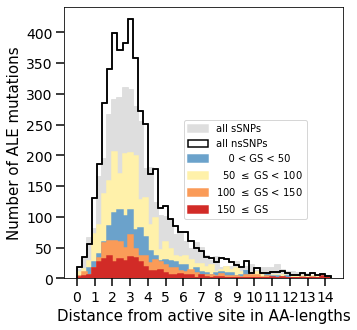

In [26]:
df_to_figure = pd.read_csv('Manuscript/SelectedOutputData/DatasetS5A-Fig3C_ALE_007A_FunctionalDomains_ACT_SITE.csv',index_col=0)

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5)

bins = np.linspace(0,100,51)
lw = 1.5
#synoynmous
data=df_to_figure[df_to_figure.get('009_gs_max_ALE') ==0]
ax.hist(data.Distance.values,bins = bins, histtype='stepfilled', color = '#dedede',edgecolor = '#dedede', alpha = 1,lw = lw,label = 'all sSNPs')


#all nsSNPs
data=df_to_figure[df_to_figure.get('009_gs_max_ALE') >0]
# data=data[data.get('009_gs_max_ALE') <= 100]
ax.hist(data.Distance.values,bins = bins, histtype='step', color = u'k', alpha = 1,lw = lw,linestyle ='-',label = 'all nsSNPs')

#synoynmous
data=df_to_figure[df_to_figure.get('009_gs_max_ALE') ==0]
ax.hist(data.Distance.values,bins = bins, histtype='stepfilled', color = '#dedede',edgecolor = '#dedede', alpha = 1,lw = lw,label = '')


#conservative
data=df_to_figure[df_to_figure.get('009_gs_max_ALE') <50]
data=data[data.get('009_gs_max_ALE') >0]
ax.hist(data.Distance.values,bins = bins, histtype='stepfilled', color = '#6ba2cb', edgecolor = '#6ba2cb', alpha = 1,lw = lw,label = '    0 < GS < 50')


#moderately conservative
data=df_to_figure[df_to_figure.get('009_gs_max_ALE') <100]
data=data[data.get('009_gs_max_ALE') >= 50]
ax.hist(data.Distance.values,bins = bins, histtype='stepfilled', color = '#fff1aa', edgecolor = '#fff1aa', alpha = 1,lw = lw,label = '  50 $\leq$ GS < 100')

#conservative
data=df_to_figure[df_to_figure.get('009_gs_max_ALE') <50]
data=data[data.get('009_gs_max_ALE') >0]
ax.hist(data.Distance.values,bins = bins, histtype='stepfilled', color = '#6ba2cb', edgecolor = '#6ba2cb', alpha = 1,lw = lw,label = '')




#moderately radical
data=df_to_figure[df_to_figure.get('009_gs_max_ALE') <150]
data=data[data.get('009_gs_max_ALE') >= 100]
ax.hist(data.Distance.values,bins = bins, histtype='stepfilled', color = '#fa9b58', edgecolor = '#fa9b58', alpha = 1,lw = lw,label = '100 $\leq$ GS < 150')


#radical
data=df_to_figure[df_to_figure.get('009_gs_max_ALE') >150]
# data=data[data.get('009_gs_max_ALE') <= 100]
ax.hist(data.Distance.values,bins = bins, histtype='stepfilled', color = '#d22b27', edgecolor = u'#d22b27', alpha =1,lw = lw,label = '150 $\leq$ GS')

#all nsSNPs
data=df_to_figure[df_to_figure.get('009_gs_max_ALE') >0]
# data=data[data.get('009_gs_max_ALE') <= 100]
ax.hist(data.Distance.values,bins = bins, histtype='step', color = u'k', alpha = 1,lw = lw,linestyle ='-',label = '')

ax.set_xticks(np.linspace(0,98,15))
ax.set_xticklabels([int(x) for x in np.linspace(0,14,15)])
ax.legend(loc =(0.43,0.22))

# ax.set_yticklabels('')
# ax.set_xticklabels('')
ax.tick_params(axis='both', which='major', labelsize=14,length = 8, width = 1.5,)
ax.tick_params(axis='both', which='minor', labelsize=14,length = 4, width = 1.5)
ax.set_xlabel('Distance from active site in AA-lengths', size = 15)
ax.set_ylabel('Number of ALE mutations', size = 15)


fig.savefig('Manuscript/GeneratedFigures/Fig3C.png',dpi = 300,transparent = True, bbox_inches = 'tight')
plt.show()

# Fig. 4

##### Panel 4A

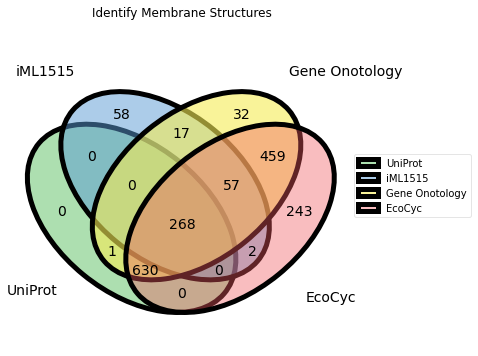

In [27]:
import json
with open('Manuscript/SelectedOutputData/005A_potentialMembraneStructuresAllSources.json',"r") as f:
    kw_membrane = json.load(f)

kw_go = set(kw_membrane['GO_structures'])
kw_iml = set(kw_membrane['IML_structures'])
kw_uni = set(kw_membrane['UNI_structures'])
kw_eco = set(kw_membrane['ECO_structures'])

from functions import venn
fig,ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(6)
ax.set_title('Identify Membrane Structures')
labels = venn.get_labels([kw_uni,kw_iml,kw_go,kw_eco])
venn.venn4(labels, names = ['UniProt','iML1515','Gene Onotology','EcoCyc'], fig = fig, ax = ax)
fig.savefig('Manuscript/GeneratedFigures/Fig4A.png',dpi = 300,transparent = True, bbox_inches = 'tight')

#### Panel 4E

In [28]:
from _figuresModule import _fig4
reload(_fig4)

<module '_figuresModule._fig4' from '/home/ecatoiu/Projects/QSPACE/_figuresModule/_fig4.py'>

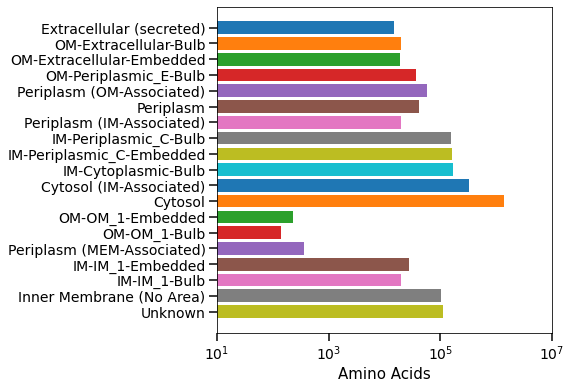

In [29]:
fig, ax = _fig4.fig4E_aa(dfQSPACE_gs,fig = False, ax = False, save = False)
fig.savefig('Manuscript/GeneratedFigures/Fig4E_AAs.png',dpi = 300,transparent = True, bbox_inches = 'tight')


A Jupyter Widget

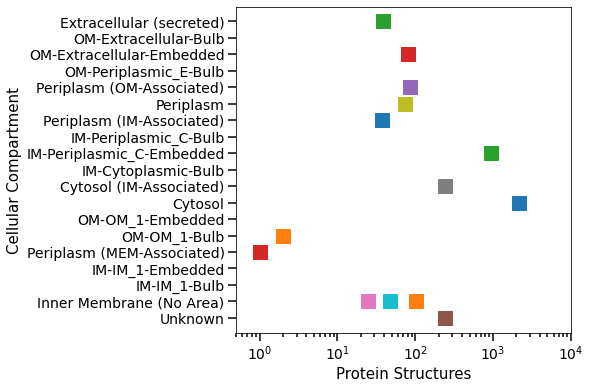

In [30]:
fig, ax = _fig4.fig4E_prot(dfQSPACE_gs,fig = False, ax = False, save = False,legend = False)
fig.savefig('Manuscript/GeneratedFigures/Fig4E_Proteins.png',dpi = 300,transparent = True, bbox_inches = 'tight')
